In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from linearmodels.iv import IV2SLS

# LN2 주택실거래가 데이터 분석(1)



## 1. 데이터의 대표값과 퍼진 정도 disperison

- 통계학은 크게 기술통계학과 추론통계학으로 나뉜다.
- 기술통계학:
- 추론통계학: 모집단에서 추출된 표본에서 얻은 통계량을 의미를 해석하여 모수를 추론하고자 함
- 범주형 변수의 경우라면 최빈값이 대표값으로 사용될 수 있음
- 평균은 극단치에 영향 받는다. 중앙값은 극단치에 영향 받는 것 적다
- 극단치가 존재하면 대표값은 중앙값이 더 적절
- 극단치의 영향을 줄이고 평균을 계산하기 위해 trimmed mean을 구할 수 있다. <- Q3

In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
from scipy import stats
from scipy.stats import trim_mean #trimmed mean

In [11]:
# trimmed mean 구하기

data=np.array([1,2,3,4,5,6,100])
data.mean() # 전체 평균

17.285714285714285

In [12]:
# trimmed mean

# 앞 뒤 0.05 씩 짜르고, 총 90%로 trimmed mean 구해보자
trim_mean(data, proportiontocut=0.05) 

17.285714285714285

In [14]:
# trim_mean(data, proportiontocut=0.05) <- 값이 7개 밖에 없어서 자를게 없었음. 그래서 전체 평균과 같았음

trim_mean(data, proportiontocut=0.15) 

4.0

### 데이터 퍼진 정도
- 필기 참고
- 표편, 분산

#### MAD Median absolute deviation 중앙값 절대편차
- 평균이 극단치의 영향을 받기 때문에, 표준편차 역시 그렇다. 
- 이를 보완하기 위해 극단치의 영향을 덜 받는 퍼진 정도는 '중앙값 절대편차'
- 각각의 값에서 중앙값을 빼고, 그 값의 중앙값을 구한다
- 공식은 필기 참고

In [17]:
# csv file을 불러오자

df=pd.read_csv('c:/temp/LN2_data1.csv')
df

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
0,0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420
1,1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465
2,2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994
4,4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217
...,...,...,...,...,...,...,...,...,...,...,...,...
191,191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168
192,192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033
193,193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332
194,194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332


In [18]:
# 위 데이터는, 서초구에서 거래된 실거래가 데이터
# 2021년 6월 1일 방배동, 15억 ㅎㅎ

# 평수가 섞여 있으니 price를 냅다 평균 내면 의미 없을 거 같다
# 그래서 평당 가격을 보자. 한 평은 3.3m2
# 그 값이 price_pyung

# dispersion 

# price의 표편을 구해보자
df['price'].std()

95597.31932419787

In [20]:
# MAD 계산해보자
stats.median_abs_deviation(df['price'])

63125.0

## 2. 히스토그램과 사분위수

- 히스토그램이 오른쪽으로 긴 꼬리 모양: 중<평
- 왼쪽으로 : 중>평
- 좌우가 대칭인 분포: 중앙값과 평균이 거의 유사하다

- 백분위수 percentile : 필기참고
- 4분위수 quantile

In [21]:
# 202년 가계금융복지조사

df2=pd.read_csv('c:/temp/LN2_data2.csv')
df2

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2
1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2
3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2
4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,2020,G2,993800291,1,42,3,6,2,6705,2200,179,-390,NaN,NaN,3
18060,2020,G2,994800251,1,49,5,6,2,130180,22000,15454,11784,O,3,1
18061,2020,G2,994800261,1,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1
18062,2020,G2,994800291,2,53,2,7,4,109695,25000,9114,7074,O,2,2


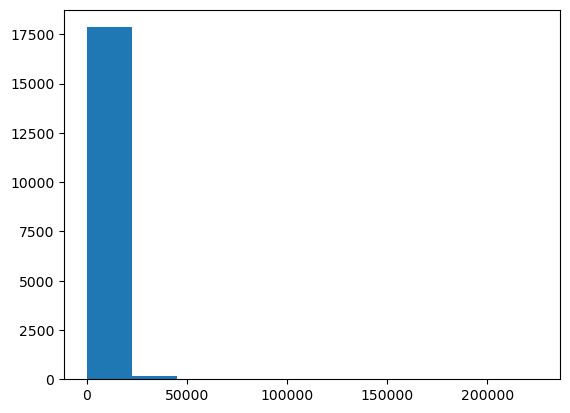

In [22]:
# sex 가구주의 성별
# income 가구의 소득, ex. 17720: 1억 7천 7백 20만원

# 히스토그램을 그려보자

%matplotlib inline

plt.hist(df2['income'])
plt.show()

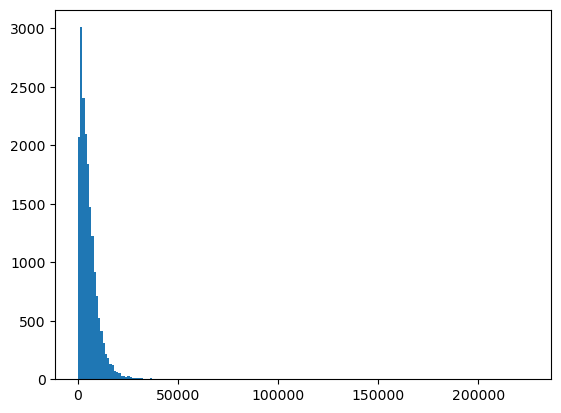

In [24]:
# 왜 막대기가 하나밖에 안 나오지?
# 그래프를 그릴때 막대기 몇개 그릴지 정하는 옶션을 넣어보자. bins=

plt.hist(df2['income'], bins=200)
plt.show()

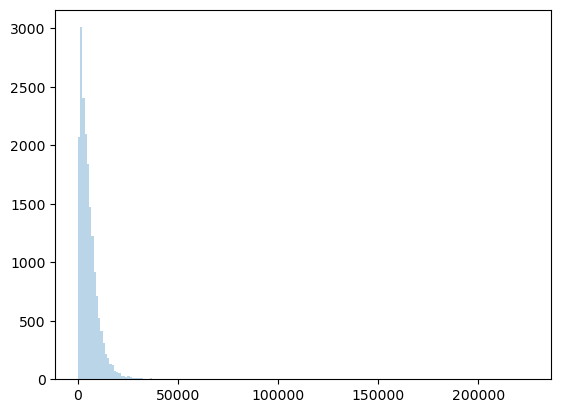

In [26]:
# 아주 오른쪽으로 꼬리가 긴 분포
# 적은 수지만, 돈 많이 버는 사람들이 있다는 것


plt.hist(df2['income'], bins=200, alpha=0.3) # alpha: 투명도 opacity 지정, 투명도 30%
plt.show()

In [30]:
# 사분위수 계산해보기

df2['income'].quantile(0.25)
# 하위 25%의 소득이 2026만원

2026.0

In [31]:
df2['income'].quantile(0.75)
# 상위 25%의 소득이 7331만원

7331.75

In [32]:
# IQR 사분위수 범위 : 3사분위와 1사분위 값의 차이
IQR=df2['income'].quantile(0.75)-df2['income'].quantile(0.25)
print(IQR)

5305.75


In [33]:
# IQR <- data의 dispersion을 측정하는 방법 ! 
# 이 값이 클 수록 사람들이 분포가 펼쳐져 있다. 돈 많이 버는 사람과 적게 버는 사람들의 격차가 크다

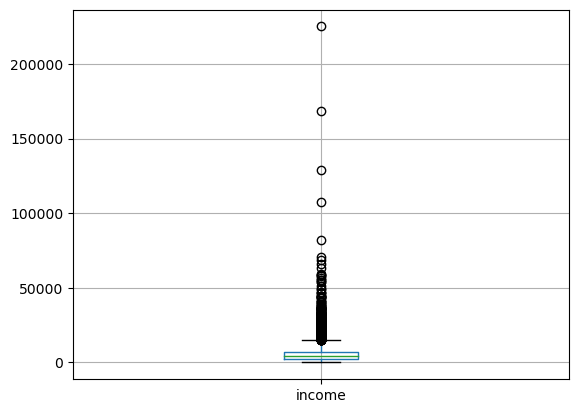

In [35]:
# Boxplot을 그려보자

df2.boxplot(column=['income'])
plt.show()

#boxplot 해석 !!! >>>>>> 필기 참고

## 3 데이터 형식과 반복문

- 데이터 형식 중 list와 tuple에 대해 알아보자
- 리스트: << 필 참

##### list

In [36]:
x=[10, 'economics', False]
x

[10, 'economics', False]

In [37]:
type(x) # x의 형식은 모야?

list

In [38]:
x[1] # x 중 첫번째 값 불러와

'economics'

In [39]:
x[0] # 파이썬은 0번째 값부터 시작함

10

In [41]:
x[0:1] # 콜론을 잘 이해해야함, 0에서 시작해서 1을 제외한 바로 앞 의 값 까지 가져와 라는 뜻.

[10]

In [42]:
x[0:2]

[10, 'economics']

In [43]:
x[0:3]

[10, 'economics', False]

In [45]:
x[-1] # 음수를 쓰면 뒤쪽부터 가져올 수 있다

False

In [48]:
# list는 값을 변경하거나 추가할 수 있음 
# 추가하기: append()

x.append(21)
x
# x의 마지막에 21에 추가되었다

[10, 'economics', False, 21, 21, 21]

In [49]:
# 변경하기

x[0]=15 # x의 0번째 값을 15로 바꿔라
x

[15, 'economics', False, 21, 21, 21]

#### tuple은 다음 시간에